In [8]:
import networkx
from network import *
from node import *

graph plotted!


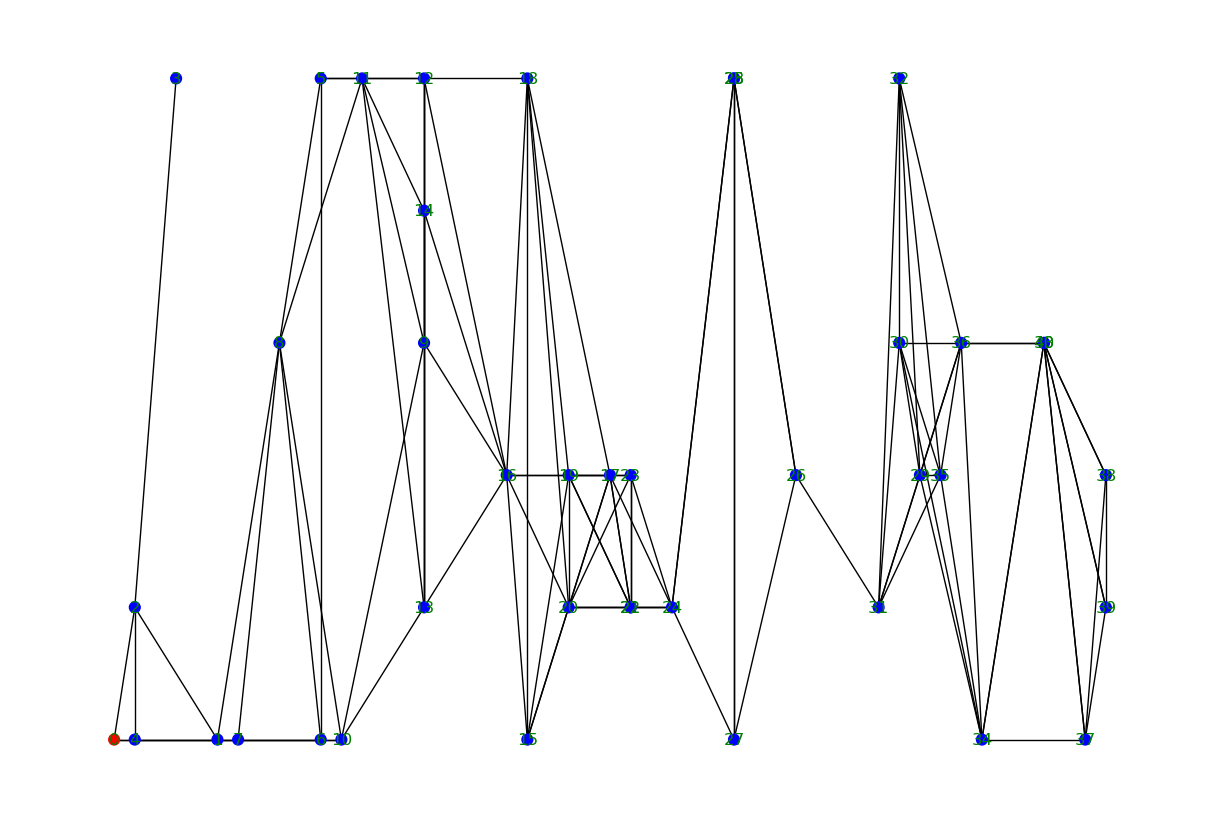

3


In [11]:
net = network(50, 50, 40, 0, 0)
net.initialise_nodes(1, 0.4)
net.set_parameters(2000, 8, 2000, 3*1e8, 5)
net.set_nxg()
net.show_graph()
print(len(net.nxg[0]))

In [12]:
path = "results/network_data/network2"
net.save_network(path)

data saved @  results/network_data/network2


In [16]:
graph_data_npy = "results/network_data/network2_network_data.npy"
graph_data = np.load(graph_data_npy, allow_pickle=True).item()
graph_data['params']['node_initial_energy'] = 1
graph_data['params']['node_critical_energy'] = 0.4
np.save(graph_data_npy, graph_data)

{'area_x': 50, 'area_y': 50, 'number_of_nodes': 40, 'base_x': 0, 'base_y': 0, 'node_initial_energy': 1, 'node_critical_energy': 0.4, 'dist_para': 2000, 'len_of_packets': 8, 'transmission_rate': 2000, 'speed_of_transmission': 300000000.0, 'radio_distance': 5}
graph plotted!


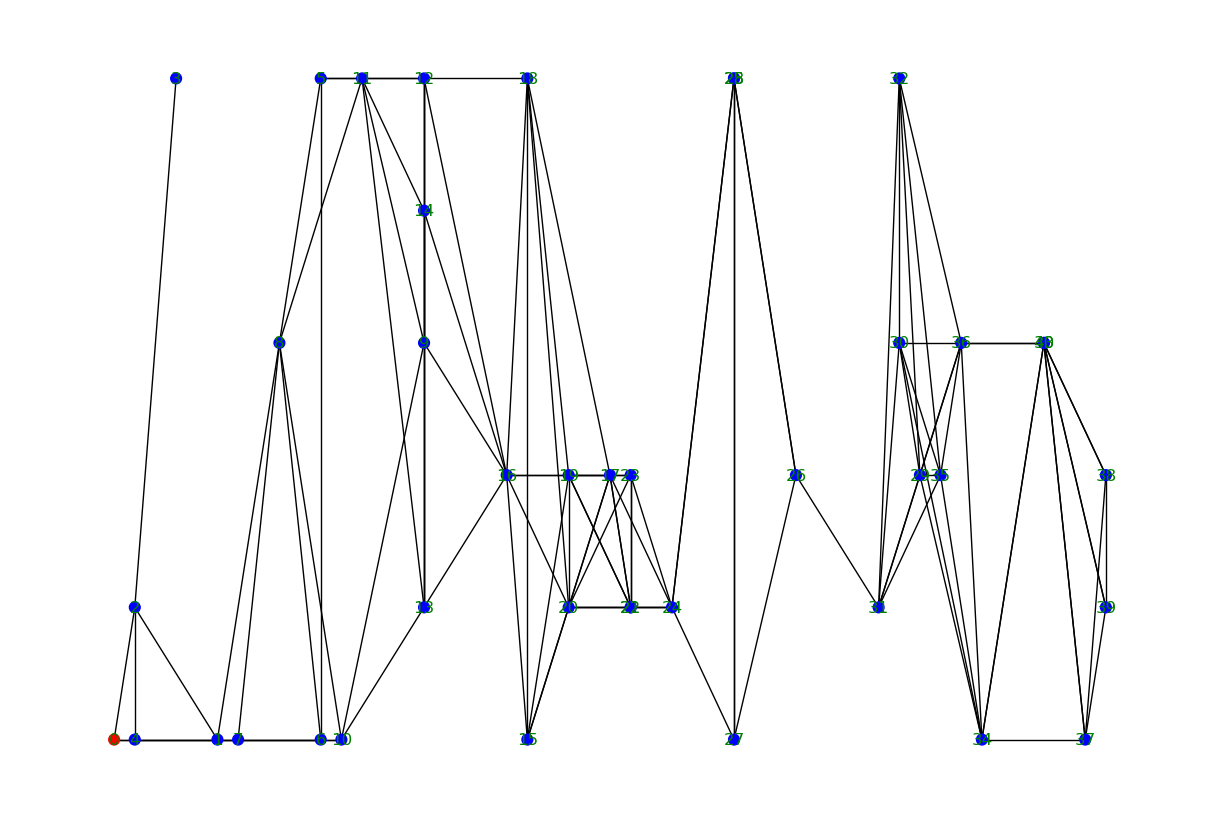

In [17]:
test_net = network(100, 100, 80, 0, 0)
x, y, graph_data = test_net.load_network_topology(graph_data_npy)
test_net.set_nxg_from_npy(graph_data)
test_net.show_graph()

[(1, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 7),
 (1, 43),
 (2, 0),
 (2, 3),
 (2, 4),
 (3, 0),
 (3, 4),
 (4, 0),
 (4, 7),
 (4, 43),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 48),
 (5, 52),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (6, 12),
 (6, 45),
 (6, 46),
 (6, 48),
 (6, 49),
 (6, 50),
 (6, 51),
 (6, 52),
 (7, 8),
 (7, 43),
 (7, 45),
 (7, 46),
 (7, 47),
 (7, 48),
 (7, 52),
 (8, 9),
 (8, 10),
 (8, 11),
 (8, 12),
 (8, 52),
 (9, 10),
 (9, 11),
 (9, 12),
 (10, 11),
 (10, 12),
 (11, 12),
 (11, 50),
 (11, 51),
 (12, 13),
 (12, 16),
 (12, 49),
 (12, 50),
 (12, 51),
 (12, 52),
 (12, 53),
 (12, 55),
 (12, 56),
 (13, 14),
 (13, 15),
 (13, 16),
 (13, 17),
 (13, 50),
 (13, 51),
 (13, 53),
 (13, 54),
 (13, 55),
 (13, 56),
 (13, 58),
 (13, 59),
 (14, 15),
 (14, 16),
 (14, 17),
 (14, 20),
 (14, 53),
 (14, 54),
 (14, 55),
 (14, 56),
 (14, 58),
 (14, 59),
 (15, 16),
 (15, 17),
 (15, 18),
 (15, 19),
 (15, 20),
 (15, 53),
 (15, 56),
 (16, 17),
 (16, 50),
 (16, 51),
 (16, 53),
 (16

In [ ]:
graph_data_npy = 